<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%204.%20%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D1%85%20%D0%B8%20%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%87%D0%BD%D1%8B%D1%85%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2%20%D0%B4%D0%BB%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_4_2_%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B0_%D0%A1%D0%BA%D0%BE%D0%BB%D1%8C%D0%B7%D1%8F%D1%89%D0%B8%D0%B9_%D0%BA%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лекция 4.2: Обучающая и тестовая выборка. Скользящий контроль

### Введение

В машинном обучении важны правильная оценка производительности модели и способность модели обобщать на новые данные. Для этого используются методы разбиения данных на обучающую и тестовую выборки, а также более сложные методы валидации, такие как скользящий контроль (cross-validation).

### Понятия признакового пространства и целевой переменной

#### Признаковое пространство

Задана выборка значений признаков $ \mathbf{x}_n $:

$$
\mathbf{x}_n = \begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1d} \\
x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd}
\end{pmatrix}
$$

Здесь $ d $ — размерность признакового пространства, а $ n $ — количество элементов в выборке.

#### Целевая переменная

Задана выборка соответствующих значений целевой переменной $ \mathbf{y} $:

$$
\mathbf{y} = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$

#### Множество исходных данных

Таким образом, наше множество исходных данных $ D $ можно представить как пары $(\mathbf{x}_i, y_i)$:

$$
D = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \ldots, (\mathbf{x}_n, y_n) \}
$$

### Обучающая и тестовая выборка

#### Обучающая выборка (Training Set)

Обучающая выборка используется для обучения модели. Модель анализирует эти данные и подбирает параметры, которые минимизируют ошибку на этих данных. Обучающая выборка должна быть достаточно большой и репрезентативной, чтобы модель могла научиться правильно идентифицировать зависимости и закономерности.

#### Тестовая выборка (Test Set)

Тестовая выборка используется для оценки производительности модели. Она не участвует в процессе обучения и предназначена для проверки, насколько хорошо модель обобщает на новые данные. Результаты на тестовой выборке дают представление о том, как модель будет вести себя на реальных данных.

### Разделение данных

Обычно данные делятся на обучающую и тестовую выборку в пропорции 70/30 или 80/20. Например, если у нас есть датасет из 1000 наблюдений, мы можем использовать 800 для обучения и 200 для тестирования.

### Задача разбиения данных

Почему бы нам просто не обучить модель на всей выборке $ D $? Чем больше данных, тем выше точность модели. Здесь мы имеем в виду, что проверка модели происходит на реальных данных, отличных от исходной выборки.

Однако в реальности $ D $ — это все доступные нам данные, и процесс оценки качества модели — её тестирование (или валидация) — происходит только на выборке $ D $, как и процесс обучения модели. Поэтому перед нами стоит задача разделения всей выборки на обучающую и тестовую части.

### Ошибка на обучающей выборке

Ошибка на обучающей выборке является смещенной. Модель отражает зависимости только на тех данных, на которых она обучалась. На тестовых данных предположение о близости выхода модели к истинному значению уже не будет выполняться. На обучающей выборке мы получаем оптимистически заниженную функцию потерь и высокую точность предсказаний. В то же время на данных вне обучающей выборки (на тестовой) точность ниже. Такая проблема возникает при переобучении модели.

### Скользящий контроль

Для решения проблемы переобучения используется метод скользящего контроля.

#### Разбиение выборки

Первым соображением мы можем разбить нашу выборку на части случайно. Но в таком случае качество метрики не улучшится, и проблема переобучения не решится. Можно брать среднюю ошибку по такому разбиению. Метрика при этом также усредняется, но оценка останется смещенной. Чтобы получить несмещенную среднюю ошибку, будем использовать скользящий контроль.

#### Процесс скользящего контроля

1. Разбиваем множество исходных данных на две непересекающиеся подвыборки $ J $ различными способами:

$$
D = D_{train}^{(j)} \cup D_{test}^{(j)}, \quad j = 1, 2, \ldots, J
$$

Здесь $ k $ — длина обучающей подвыборки, а $ m = N - k $ — длина тестовой подвыборки.

2. Для каждого разбиения из $ J $ обучаем модель и получаем метрику. Затем считаем среднее по всем полученным $ J $ значениям метрики.

#### K-fold кросс-валидация

Мы рассмотрим один из вариантов скользящего контроля, а именно k-fold кросс-валидацию:

1. Делим выборку на $ k $ блоков (folds), непересекающихся и равных по объему.
2. Производим $ k $ итераций:
    - Обучаем заранее заданную модель на $ k - 1 $ фолде.
    - Тестируем модель на 1 фолде, не участвующем в обучении, и считаем метрику на $ i $-й итерации.
    - Смещаем инициализацию фолдов для обучения на 1.
3. Считаем среднее по полученным метрикам:

$$
\text{Средняя ошибка} = \frac{1}{k} \sum_{i=1}^{k} \text{Ошибка}_i
$$

На рисунке ниже показан пример инициализации фолдов для кросс-валидации.

![K-fold cross-validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

Первый фолд $ F[0] $ будет тестовым, остальные $ k - 1 $ фолдов пойдут в обучающую выборку $ F[1 : k - 1] $. После итерации обучения и тестирования назначаем следующий фолд в качестве тестового — $ F[1] $, а для обучающей выборки — фолды $ F[2 : k - 1] + F[0] $. Затем снова итерация обучения и тестирования и так далее.

### Достоинства и недостатки

#### Достоинства

- **Более точная оценка**: Скользящий контроль дает более точную оценку производительности модели, особенно на небольших датасетах.
- **Использование всех данных**: Все данные используются и для обучения, и для тестирования, что улучшает обобщающую способность модели.

#### Недостатки

- **Время и ресурсы**: K-fold кросс-валидация требует больше времени и вычислительных ресурсов, так как модель обучается $ k $ раз.
- **Сложность**: Реализация и интерпретация результатов могут быть сложнее, чем при простом разделении данных.
Таким образом, правильное разделение данных на обучающую и тестовую выборку, а также использование методов скользящего контроля, таких как k-fold кросс-валидация, являются важными шагами в процессе машинного обучения. Эти методы помогают обеспечить надежную оценку производительности модели и её способности обобщать на новые данные.

### Пример разделения данных на обучающую и тестовую выборку

Предположим, у нас есть датасет с информацией о жилье, где каждая запись содержит следующие признаки (для простоты рассмотрим 4 признака):

$$
\mathbf{x}_n = \begin{pmatrix}
x_{1n} & x_{2n} & x_{3n} & x_{4n}
\end{pmatrix}
$$

и соответствующую целевую переменную — цену жилья:

$$
\mathbf{y} = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$

Допустим, в нашем датасете 1000 наблюдений (жилья). Мы хотим разделить данные на обучающую и тестовую выборки в пропорции 80/20. Это значит, что:

- Обучающая выборка будет составлять 80% от всего датасета: $ 0.8 \times 1000 = 800 $ наблюдений.
- Тестовая выборка будет составлять 20% от всего датасета: $ 0.2 \times 1000 = 200 $ наблюдений.

### Пример скользящего контроля: k-fold кросс-валидация

Допустим, мы хотим использовать 5-fold кросс-валидацию для оценки производительности нашей модели. Это означает, что мы разобьем нашу обучающую выборку на 5 равных частей (folds), и для каждой итерации одна из этих частей будет выступать в качестве тестовой выборки, а остальные — в качестве обучающей.

1. Разобьем обучающую выборку на 5 фолдов:

   - Фолд 1: 160 наблюдений
   - Фолд 2: 160 наблюдений
   - Фолд 3: 160 наблюдений
   - Фолд 4: 160 наблюдений
   - Фолд 5: 160 наблюдений

2. Процесс кросс-валидации:

   - **Итерация 1**: Используем Фолд 1 как тестовый и обучаем модель на Фолдах 2, 3, 4, 5.
   - **Итерация 2**: Используем Фолд 2 как тестовый и обучаем модель на Фолдах 1, 3, 4, 5.
   - **Итерация 3**: Используем Фолд 3 как тестовый и обучаем модель на Фолдах 1, 2, 4, 5.
   - **Итерация 4**: Используем Фолд 4 как тестовый и обучаем модель на Фолдах 1, 2, 3, 5.
   - **Итерация 5**: Используем Фолд 5 как тестовый и обучаем модель на Фолдах 1, 2, 3, 4.

3. Вычисление средней ошибки:

   После завершения всех итераций вычисляем среднюю ошибку модели на всех 5 итерациях кросс-валидации.

### Заключение

Такие числовые примеры помогают наглядно представить, как происходит разделение данных и оценка модели в машинном обучении. Правильное использование обучающей и тестовой выборки, а также методов скользящ





Для реализации простой линейной регрессии на Python мы будем использовать библиотеку scikit-learn, которая предоставляет удобные инструменты для работы с машинным обучением, включая различные модели регрессии.

Средняя квадратичная ошибка на тестовой выборке: 0.9177532469714291


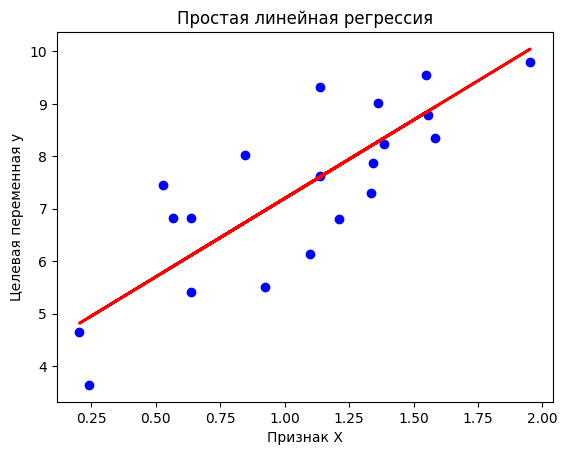

In [ ]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Шаг 1: Генерация искусственных данных
np.random.seed(0)  # для воспроизводимости результата
X = 2 * np.random.rand(100, 1)  # генерируем 100 случайных чисел от 0 до 2
y = 4 + 3 * X + np.random.randn(100, 1)  # создаем y с добавлением шума

# Шаг 2: Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 3: Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Шаг 4: Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Средняя квадратичная ошибка на тестовой выборке: {mse}")

# Визуализация результатов
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Простая линейная регрессия')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.show()

Фолд 1: MSE = 0.917753246971429
Фолд 2: MSE = 0.964551617482514
Фолд 3: MSE = 1.3114686655576668
Фолд 4: MSE = 0.907798022977155
Фолд 5: MSE = 1.107341090413874
Среднее MSE по кросс-валидации: 1.0417825286805278


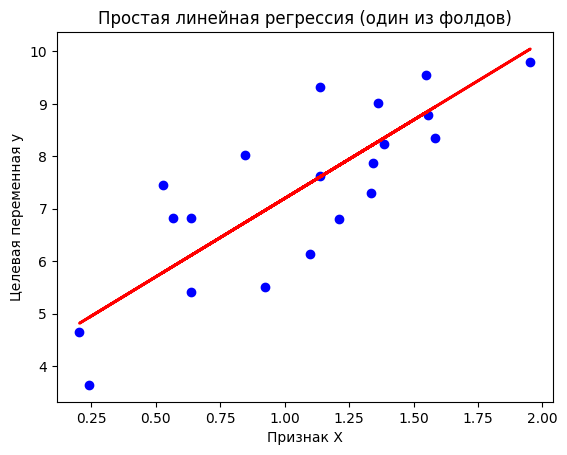

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Генерация искусственных данных
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Создание модели линейной регрессии
model = LinearRegression()

# Кросс-валидация с k=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Список для хранения метрик качества по каждому фолду
fold_scores = []

# Итерация по фолдам
for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Обучение модели на обучающей выборке текущего фолда
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке текущего фолда
    y_pred = model.predict(X_test)

    # Вычисление метрики качества (MSE) для текущего фолда
    fold_score = mean_squared_error(y_test, y_pred)
    fold_scores.append(fold_score)

    # Вывод результатов для текущего фолда
    print(f"Фолд {fold_idx + 1}: MSE = {fold_score}")

# Вычисление и вывод среднего значения MSE по всем фолдам
mean_mse = np.mean(fold_scores)
print(f"Среднее MSE по кросс-валидации: {mean_mse}")

# Визуализация результатов для одного из фолдов (например, первого)
train_index, test_index = list(kf.split(X))[0]
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Простая линейная регрессия (один из фолдов)')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.show()

Давайте проанализируем  полученные результаты:

Полученные значения среднеквадратической ошибки (MSE) по каждому фолду:
- Фолд 1: MSE = 0.917753246971429
- Фолд 2: MSE = 0.964551617482514
- Фолд 3: MSE = 1.3114686655576668
- Фолд 4: MSE = 0.907798022977155
- Фолд 5: MSE = 1.107341090413874

Среднее значение MSE по всем фолдам: 1.0417825286805278

Эти результаты показывают, что модель линейной регрессии в среднем ошибается на 1.0417825286805278 единиц целевой переменной y. Это довольно неплохой результат для простой линейной модели, обученной на сгенерированных данных.

Важно отметить, что кросс-валидация помогает оценить обобщающую способность модели и избежать переобучения. Разброс значений MSE по фолдам также дает представление о стабильности модели.

